In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from scripts.ellipse import CosmoFisher
from scripts.plot_contour import plot_ellipse, plot_ellipse_simple
rc('text', usetex=True)
rc('font', family='serif')
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

## Steps:

### 1. Update cosmological parameter values

In [3]:
# dictionary of cosmological parameters (add or remove rows as needed)
cosmo_params = {
        'Om': {'value': 0.26, 'label': '$\Omega_m$'},
        's8': {'value': 0.84, 'label': '$\sigma_8$'},
        'w0': {'value': -1, 'label': '$w_0$'},
        'ns': {'value': 0.9649, 'label': '$n_s$'},
        'Ob': {'value': 0.0493, 'label': '$\Omega_b$'},
        'H0': {'value': 67.3, 'label': '$H_0$'},
        'S8': {'value': 0.78, 'label': '$S_8$'}
        }

### 2. Add Fisher Matrices 

In [4]:
# sample N x N Fisher matrices for N parameters for each configuration/method
fisher_matrix_1 = [
    [1.0, 0.5, 0.3, 0.2, 0.1, 0.1],
    [0.5, 1.0, 0.4, 0.3, 0.2, 0.2],
    [0.3, 0.4, 1.0, 0.5, 0.3, 0.3],
    [0.2, 0.3, 0.5, 1.0, 0.4, 0.4],
    [0.1, 0.2, 0.3, 0.4, 1.0, 0.5],
    [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
]
fisher_matrix_2 = [
    [1.0, 0.9, 0.7, 0.6, 0.5, 0.5],
    [0.9, 1.0, 0.8, 0.7, 0.6, 0.6],
    [0.7, 0.8, 1.0, 0.9, 0.7, 0.7],
    [0.6, 0.7, 0.9, 1.0, 0.8, 0.8],
    [0.5, 0.6, 0.7, 0.8, 1.0, 1.0],
    [0.5, 0.6, 0.7, 0.8, 1.0, 1.0]
]      

# update values and labels and add rows as needed
fisher_dict = {
    'f1': {'value': fisher_matrix_1, 'label': 'Method 1'},
    'f2': {'value': fisher_matrix_2, 'label': 'Method 2'}
}

fisher_matrices = list(fisher_dict.keys())

['f1', 'f2']

### 3. Customise contour colours

In [17]:
recon_colors = [
    [0.0, 0.302, 0.698],  # Medium Blue
    [0.282, 0.82, 0.8],  # Teal
    [1.0, 0.647, 0],  # Orange
    [0.118, 0.565, 1.0],  # Blue
    [1.0, 0.41, 0.71],  # Pink
    [0.4, 0.8, 0.2],  # Green
    [0.729, 0.333, 0.827], # Purple
    ]

### 4. Plot contours for a given pair of cosmological parameters

In [18]:
p1 = 'Om'
p2 = 's8'

for index, f in enumerate(fisher_matrices):
    fisher_matrix = fisher_dict[f]['value']
    plot_ellipse(p1, p2, fisher_matrix, cosmo_params, color=recon_colors[i], label=fisher_dict[f]['label'])


axs = plot_ellipse_simple(p1, p2, fisher_matrix_1, cosmo_params, color=recon_colors[0], label='Method 1')
plot_ellipse_simple(p1, p2, fisher_matrix_2, cosmo_params, axs=axs, color=recon_colors[1], label='Method 2');

TypeError: plot_ellipse_simple() missing 1 required positional argument: 'params_hist_lim'

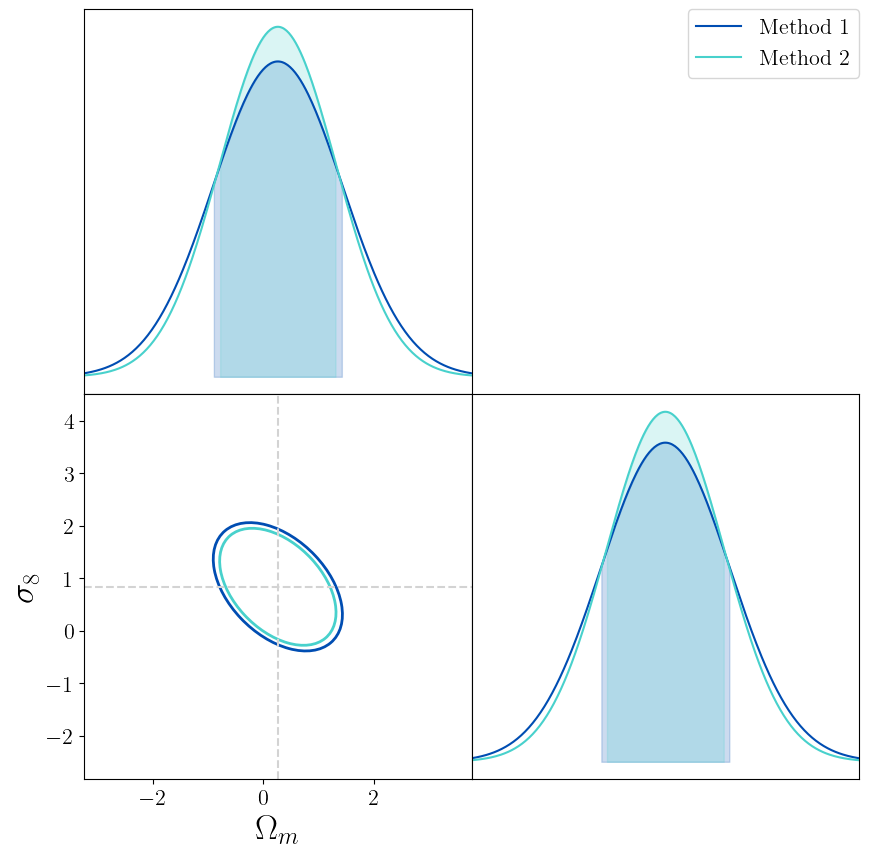

In [ ]:
# maybe add some tips to edit box sizes

In [ ]:
# just plot a few examples

axs = plot_ellipse(p1,p2,'true','',color=recon_colors[0],label='True',dash=True)
plot_ellipse(p1,p2,'ks','_n+m',axs=axs,color=recon_colors[3],label='Kaiser Squires')
plot_ellipse(p1,p2,'wf','_n+m',axs=axs,color=recon_colors[4],label='Wiener Filter')
plot_ellipse(p1,p2,'darkmappy','_n+m',axs=axs,color=recon_colors[5],label='$\\texttt{Darkmappy}$')
plot_ellipse(p1,p2,'deepmass','_n+m',axs=axs,color=recon_colors[6],label='$\\texttt{DeepMass}$')
plt.savefig(f'plots/contour_{p1}_{p2}.pdf',bbox_inches='tight');